<Figure size 1500x500 with 0 Axes>

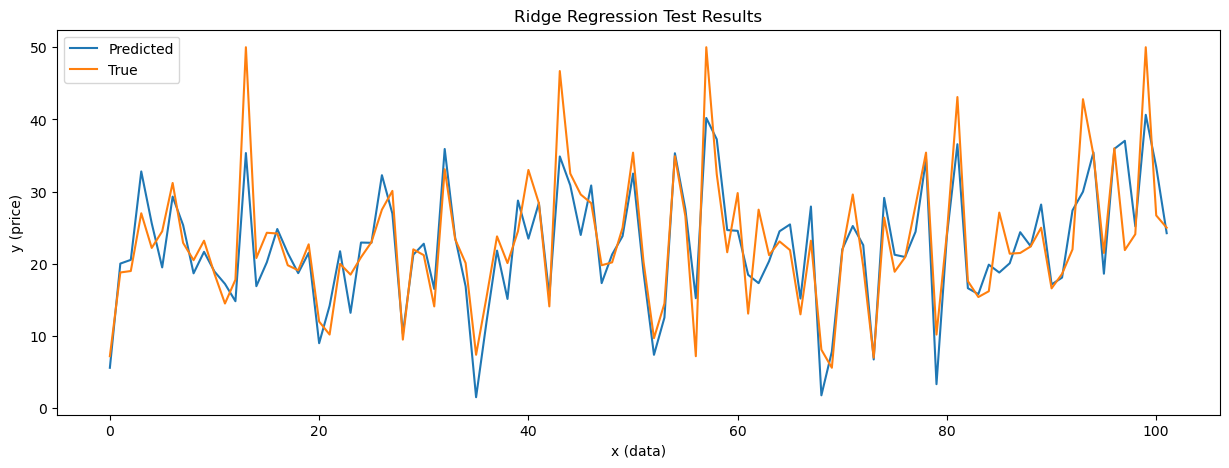

RMSE: 4.57156432747509


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import linear_model
from sklearn.decomposition import PCA
import pandas as pd
from keras.datasets import boston_housing
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

#Part(1)
#Load data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
#normalize data
x_train -= np.mean(x_train, axis=0)
x_train /= np.std(x_train, axis=0)
x_test -= np.mean(x_test, axis=0)
x_test /= np.std(x_test, axis=0)

#(i) baseline model
np.random.seed(0)
ridge = linear_model.RidgeCV()
ridge.fit(x_train, y_train)
plt.figure(figsize = (15,5))
plt.figure(figsize = (15,5))
plt.plot(ridge.predict(x_test))
plt.plot(y_test)
plt.title("Ridge Regression Test Results")
plt.xlabel("x (data)")
plt.ylabel("y (price)")
plt.legend(["Predicted", "True"])
plt.show()
y_pred = ridge.predict(x_test)
RMSE = np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE:", RMSE)

<Figure size 800x600 with 0 Axes>

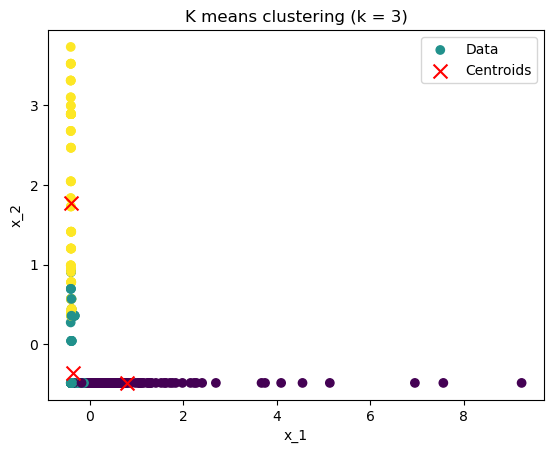

In [3]:
#(ii) clustering the training data
np.random.seed(0)
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(x_train)
Center = kmeanModel.cluster_centers_
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
plt.scatter(x_train[:, 0], x_train[:, 1], c= kmeanModel.labels_.astype(float), cmap='viridis', marker='o')
plt.scatter(Center[:, 0], Center[:, 1], color = 'red', marker = 'x', s = 100)
plt.title("K means clustering (k = 3)")
plt.xlabel("x_1")
plt.ylabel("x_2")
ax.legend(["Data", "Centroids"])
plt.show()

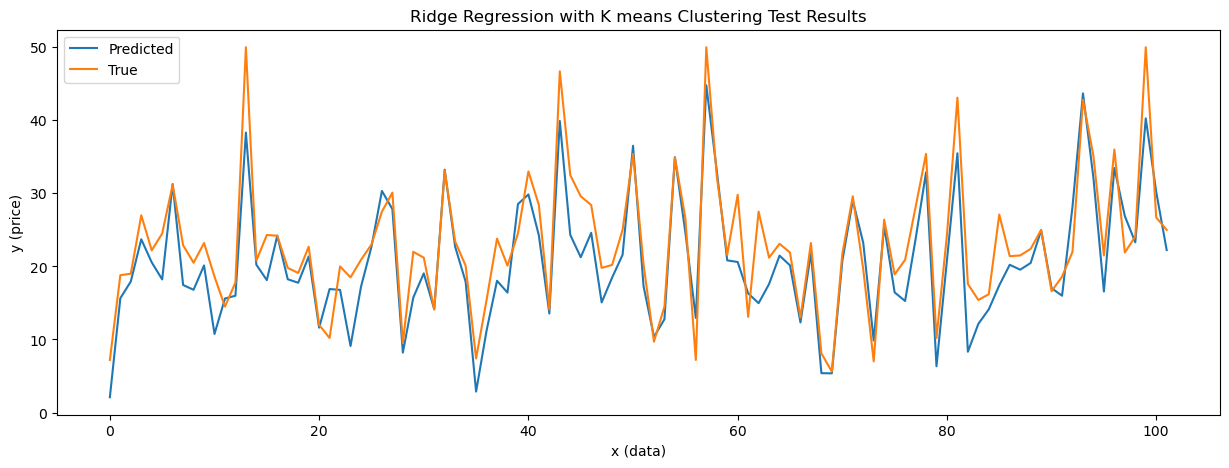

RMSE_new= 4.354339231811066


In [4]:
#(iii) train 3 seperate models
clusters_label = kmeanModel.labels_
T_list= []
for i in range(0,3):
    T_xtrain = x_train[clusters_label == i]
    T_ytrain= y_train[clusters_label == i]
    T_i= linear_model.RidgeCV()
    T_i.fit(T_xtrain, T_ytrain)
    T_list.append(T_i)
test_clusters_label = kmeanModel.predict(x_test)
y_pred = np.zeros_like(y_test)
for k in range(0,3):
    x_test_k = x_test[test_clusters_label == k]
    y_pred_i = T_list[k].predict(x_test_k)
    y_pred[test_clusters_label == k] = y_pred_i
plt.figure(figsize = (15,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.title("Ridge Regression with K means Clustering Test Results")
plt.xlabel("x (data)")
plt.ylabel("y (price)")
plt.legend(["Predicted", "True"])
plt.show()
RMSE =np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE_new=",RMSE)


[4.36851407 4.21776982 4.23003123 4.2623331  4.09040089 4.19099597]


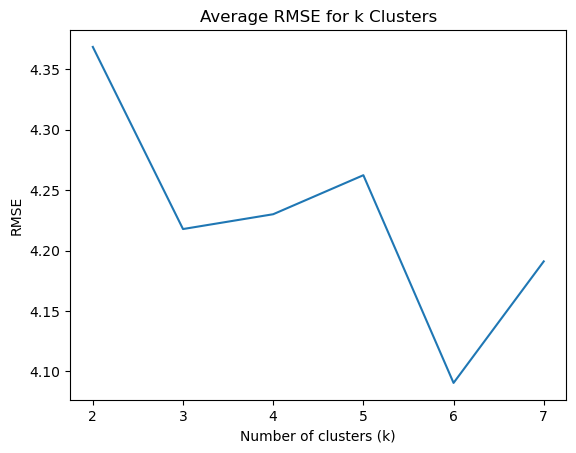

4.090400887606849


In [31]:
#Part(2) Open-ended exploration

# Experiment1: Adjusting number of clusterings
RMSE=[0]*6
iter = 30
np.random.seed(1)
for i in range(iter):
  for m in range (2,8):
      kmeanModel = KMeans(n_clusters=m)
      kmeanModel.fit(x_train)
      clusters_label = kmeanModel.labels_
      T_list= []
      for i in range(0,m):
          T_xtrain = x_train[clusters_label == i]
          T_ytrain= y_train[clusters_label == i]
          T_i= linear_model.RidgeCV()
          T_i.fit(T_xtrain, T_ytrain)
          T_list.append(T_i)
      test_clusters_label = kmeanModel.predict(x_test)
      y_pred = np.zeros_like(y_test)
      for k in range(0,m):
          x_test_k = x_test[test_clusters_label == k]
          y_pred_i = T_list[k].predict(x_test_k)
          y_pred[test_clusters_label == k] = y_pred_i
      RMSE[m-2] += np.sqrt(np.mean((y_pred - y_test)**2))
RMSE = np.array(RMSE)
RMSE = RMSE/iter
print(RMSE)
plt.figure()
plt.plot(np.arange(2,8),RMSE)
plt.xlabel('Number of clusters (k)')
plt.ylabel('RMSE')
plt.title('Average RMSE for k Clusters')
plt.show()
print(np.min(RMSE))


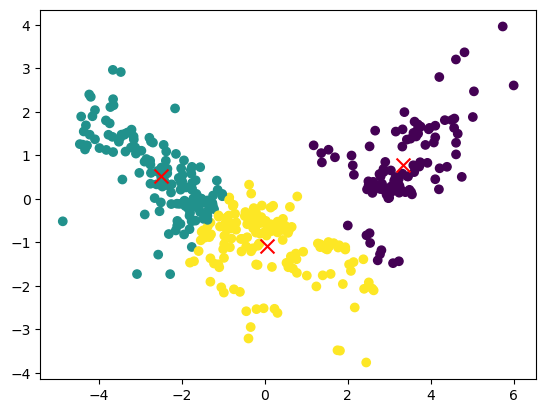

<Figure size 800x600 with 0 Axes>

In [9]:
#Applying PCA: visualization of the clusterings
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)
kmeanModel2 = KMeans(n_clusters=3)
kmeanModel2.fit(X_train_pca)
Center2 = kmeanModel2.cluster_centers_
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= kmeanModel2.labels_.astype(float), cmap='viridis', marker='o')
plt.scatter(Center2[:, 0], Center2[:, 1], color = 'red', marker = 'x', s = 100)
plt.figure(figsize=(8, 6))
plt.show()

[[5.44627874 4.80009801 4.89397406 4.09519298 4.06171208]
 [3.71342366 4.71212548 4.7320401  4.72158473 4.16434687]
 [3.85588131 4.59920847 4.14628942 4.2243083  4.19267233]
 [4.3234686  4.406634   4.19228826 4.26245146 4.12338341]
 [4.21838054 4.25885445 4.37391984 4.24651729 4.11829863]
 [4.05052473 4.40712705 4.17163386 4.20396696 4.06433951]]


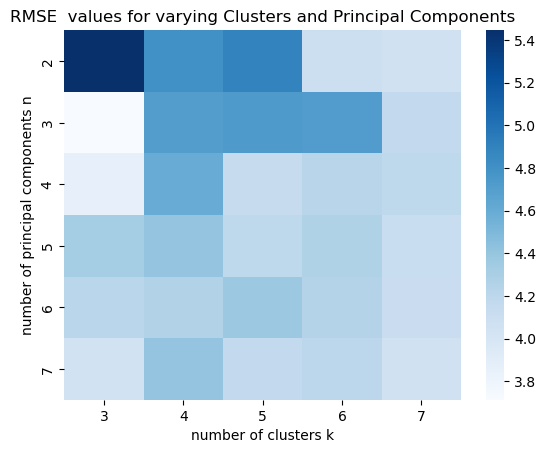

In [7]:
# Experiment 2: Combining PCA and k-means to partition the training data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

RMSE_matrix=np.zeros((6,5))
iter = 10
for i in range(iter):
  for m in range (2,8):
      for z in range (3,8):
          pca = PCA(n_components=m)
          X_train_pca = pca.fit_transform(x_train)
          X_test_pca = pca.transform(x_test)
          kmeanModel2 = KMeans(n_clusters=z)
          kmeanModel2.fit(X_train_pca)
          clusters_label2 = kmeanModel2.labels_
          T_list= []
          for i in range(0,z):
              T_xtrain = x_train[clusters_label2 == i]
              T_ytrain= y_train[clusters_label2 == i]
              T_i= linear_model.RidgeCV()
              T_i.fit(T_xtrain, T_ytrain)
              T_list.append(T_i)
          test_clusters_label2 = kmeanModel2.predict(X_test_pca)
          y_pred = np.zeros_like(y_test)
          for k in range(0,z):
              x_test_k = x_test[test_clusters_label2 == k]
              y_pred_i = T_list[k].predict(x_test_k)
              y_pred[test_clusters_label2 == k] = y_pred_i
          RMSE_matrix[m-2,z-3] += np.sqrt(np.mean((y_pred - y_test)**2))
RMSE_matrix = RMSE_matrix/(iter)
print(RMSE_matrix)
x_labels = ['3', '4', '5','6','7']  
y_labels = ['2', '3', '4','5','6','7']  

sns.heatmap(RMSE_matrix, cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)
plt.title("RMSE  values for varying Clusters and Principal Components")
plt.xlabel("number of clusters k")
plt.ylabel("number of principal components n")
plt.show()



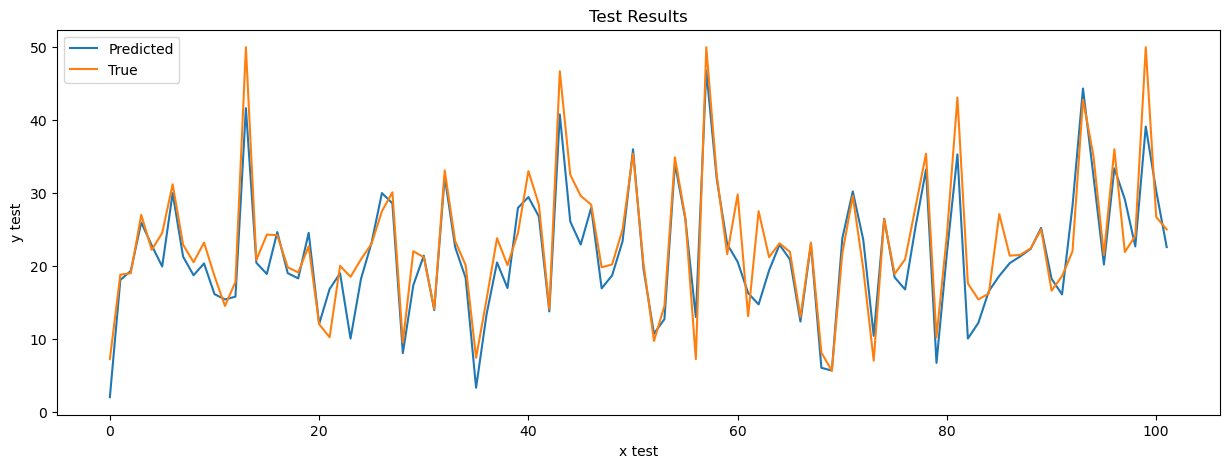

RMSE:  3.711905619692856


In [8]:
# Fit the model using 3 components and 3 clusters (the optimal combination)
m = 3
z = 3
pca = PCA(n_components=m)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)
kmeanModel2 = KMeans(n_clusters=z)
kmeanModel2.fit(X_train_pca)
clusters_label2 = kmeanModel2.labels_
T_list= []
for i in range(0,z):
    T_xtrain = x_train[clusters_label2 == i]
    T_ytrain= y_train[clusters_label2 == i]
    T_i= linear_model.RidgeCV()
    T_i.fit(T_xtrain, T_ytrain)
    T_list.append(T_i)
test_clusters_label2 = kmeanModel2.predict(X_test_pca)
y_pred = np.zeros_like(y_test)
for k in range(0,z):
    x_test_k = x_test[test_clusters_label2 == k]
    y_pred_i = T_list[k].predict(x_test_k)
    y_pred[test_clusters_label2 == k] = y_pred_i
plt.figure(figsize = (15,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.title("Test Results")
plt.xlabel("x test")
plt.ylabel("y test")
plt.legend(["Predicted", "True"])
plt.show()
print("RMSE: ", np.sqrt(np.mean((y_pred - y_test)**2)))

<Figure size 1000x600 with 0 Axes>

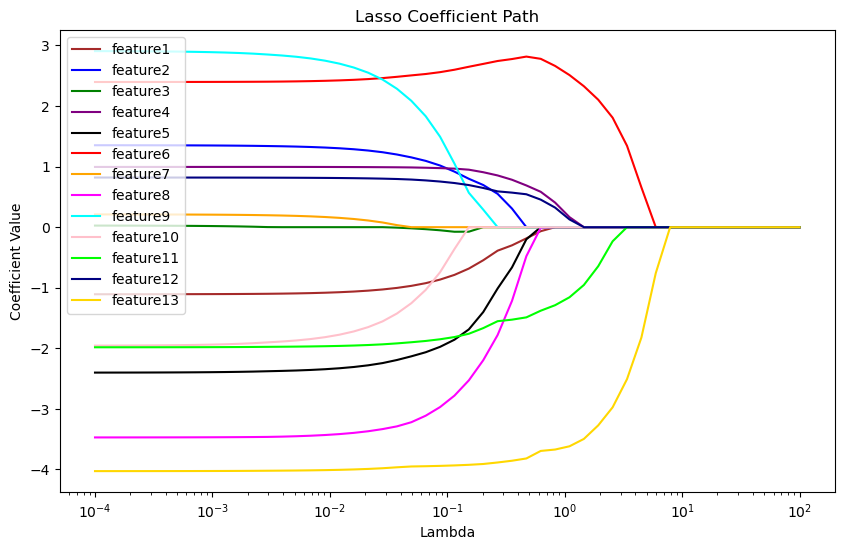

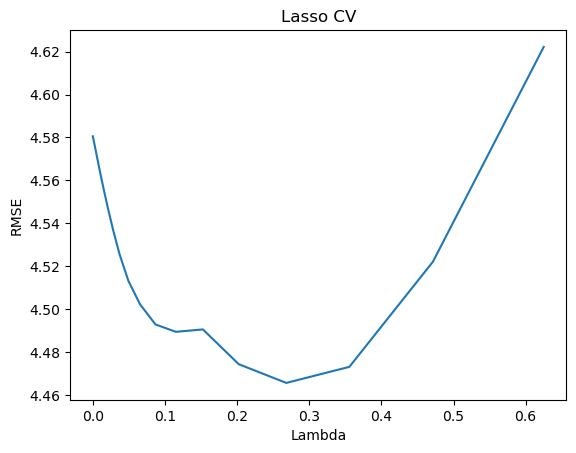

In [34]:
# Experiment 4: Applying Lasso model to explore the relative importance of factors in prediction
lambdas = np.logspace(np.log10(100), np.log10(0.0001), 50)
beta_path = np.zeros((13, len(lambdas)))
RMSE=[]
for l, lambd in enumerate(lambdas):
    Lasso=linear_model.Lasso(alpha=lambd)
    Lasso.fit(x_train,y_train)    
    beta=Lasso.coef_
    beta_path[:,l]=beta
    y_pred = Lasso.predict(x_test)
    RMSE.append(np.sqrt(np.mean((y_pred - y_test)**2)))
plt.figure(figsize=(10, 6))
colors = ['brown', 'blue', 'green', 'purple', 'black', 'red', 'orange', 'magenta', 'cyan', 'pink', 'lime', 'navy', 'gold']
plt.figure(figsize=(10, 6))
for i in range(beta_path.shape[0]):
    plt.plot(lambdas, beta_path[i, :], label=f'feature{i+1}', color=colors[i % len(colors)])
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficient Path')
plt.legend()
plt.show()
plt.plot(lambdas[-32:],RMSE[-32:])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso CV')
plt.show()


Coefficients: [-0.37630853  0.51765604 -0.          0.8444499  -0.96608055  2.74744441
 -0.         -1.70531449  0.         -0.         -1.54882064  0.58816081
 -3.88058896]
RMSE: 4.465108309652954


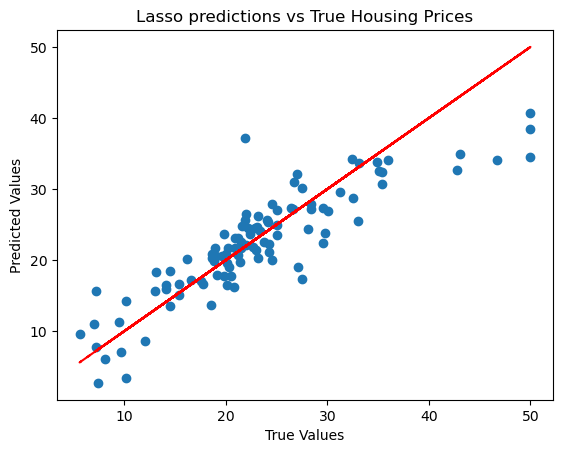

In [37]:
# Fit the Lasso model using the optimal lambda
np.random.seed(0)
Lasso=linear_model.Lasso(alpha=0.28)
Lasso.fit(x_train,y_train)    
beta=Lasso.coef_
print("Coefficients:",beta)
y_pred = Lasso.predict(x_test)
print("RMSE:",np.sqrt(np.mean((y_pred - y_test)**2)))


plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Lasso predictions vs True Housing Prices")
plt.show()